<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Interactive Polynomial Solution Space

#### Michael J. Pyrcz, Professor, The University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

Here's a simple workflow, demonstration of the solution space of linear regression for machine learning-based predictions. In the future I will add general polynomial modeling. Here's some basic details about linear regression. 

* I have a lecture on [Linear Regression](https://youtu.be/0fzbyhWiP84) as part of my [Machine Learning](https://www.youtube.com/playlist?list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf) course. Note, all recorded lectures, interactive and well-documented workflow demononstrations are available on my GitHub repository [GeostatsGuy's Python Numerical Demos](https://github.com/GeostatsGuy/PythonNumericalDemos). 

#### Linear Regression

Linear regression for prediction.  Here are some key aspects of linear regression:

**Parametric Model**

* the fit model is a simple weighted linear additive model based on all the available features, $x_1,\ldots,x_m$.

* the general form of the multilinear regression model takes the form of $y = \sum_{\alpha = 1}^m b_{\alpha} X_{\alpha} + b_0$

* the specific form of the linear regression model takes the form $y = b_1 x + b_0$

**Least Squares**

* least squares optimization is applied to select the model parameters, $b_1,\ldots,b_m,b_0$ 

* we minize the error over the trainind data $\sum_{i=1}^n (y_i - (\sum_{\alpha = 1}^m b_{\alpha} x_{\alpha} + b_0))^2$

* this could be simplified as the sum of square error over the training data, $\sum_{i=1}^n (\Delta y_i)^2$

**Assumptions**

* **Error-free** - predictor variables are error free, not random variables 
* **Linearity** - response is linear combination of feature(s)
* **Constant Variance** - error in response is constant over predictor(s) value
* **Independence of Error** - error in response are uncorrelated with each other
* **No multicollinearity** - none of the features are redundant with other features 

#### Other Resources

This is a tutorial / demonstration of **Linear Regression**.  In $Python$, the $SciPy$ package, specifically the $Stats$ functions (https://docs.scipy.org/doc/scipy/reference/stats.html) provide excellent tools for efficient use of statistics.  
I have previously provided this example in R and posted it on GitHub:

* [Linear Regression in R](https://github.com/GeostatsGuy/geostatsr/blob/master/linear_regression_demo_v2.R)
* [Linear Regression in R markdown](https://github.com/GeostatsGuy/geostatsr/blob/master/linear_regression_demo_v2.Rmd) with docs 
* [Linear Regression in R document](https://github.com/GeostatsGuy/geostatsr/blob/master/linear_regression_demo_v2.html) knit as an HTML document

and also in Excel:

* [Linear Regression in Excel](https://github.com/GeostatsGuy/ExcelNumericalDemos/blob/master/Linear_Regression_Demo_v2.xlsx)

#### Workflow Goals

Learn the basics of time series analysis in Python to for analysis, modeling and prediction with production data. This includes:

* Basic Python workflows and data preparation

* Training linear regression model parameters to training data

* Model visualizaton and checking  

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal. 
3. In the terminal type: pip install geostatspy. 
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

You may want to copy the data file to your working directory. They are available here:

* Tabular data - [Density_Por_data.csv](https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/Density_Por_data.csv).

or you can use the code below to load the data directly from my GitHub [GeoDataSets](https://github.com/GeostatsGuy/GeoDataSets) repository.

#### Import Required Packages

Let's import the GeostatsPy package.

In [1]:
supress_warnings = False
import os                                                   # to set current working directory 
import numpy as np                                          # arrays and matrix math
import scipy.stats as st                                    # statistical methods
import pandas as pd                                         # DataFrames
import matplotlib.colors as colors                          # color bar normalization                                          
import matplotlib.pyplot as plt                             # for plotting
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) # control of axes ticks
cmap = plt.cm.inferno                                       # default color bar, no bias and friendly for color vision defeciency
plt.rc('axes', axisbelow=False)                              # grid behind plotting elements
seed = 73073                                                # random number seed
if supress_warnings == True:
    import warnings                                         # supress any warnings for this demonstration
    warnings.filterwarnings('ignore')  

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs. 

#### Declare functions

Let's define a couple of functions to streamline plotting correlation matrices and visualization of a decision tree regression model. 

In [2]:
def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks   

#### Set the Working Directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).  Also, in this case make sure to place the required (see below) data file in this working directory.  

In [3]:
#os.chdir("C:\PGE337")                                       # set the working directory

#### Loading Data

Let's load the provided dataset. 'Density_Por_data.csv' is available at https://github.com/GeostatsGuy/GeoDataSets. It is a comma delimited file with 20 density measures ($\frac{g}{cm^3}$) and porosity measures from 2 rock units from the subsurface, porosity (as a fraction). We load it with the pandas 'read_csv' function into a data frame we called 'df' and then preview it by printing a slice and by utilizing the 'head' DataFrame member function (with a nice and clean format, see below).


In [4]:
add_error = False                                         # add random error to the response feature
std_error = 1.0; seed = 71071

yname = 'Porosity'; xname = 'Density'                     # specify the predictor features (x2) and response feature (x1)
xmin = 1.0; xmax = 2.5                                    # set minumums and maximums for visualization 
ymin = 0.0; ymax = 25.0
xlabel = 'Porosity'; ylabel = 'Density'                   # specify the feature labels for plotting
yunit = '%'; xunit = '$g/cm^{3}$'
Xlabelunit = xlabel + ' (' + xunit + ')'
ylabelunit = ylabel + ' (' + yunit + ')'

#df = pd.read_csv("Density_Por_data.csv")                 # load the data from local current directory
df = pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/Density_Por_data.csv") # load the data from my github repo
df = df.sample(frac=.30, random_state = 73073); df = df.reset_index() # extract 30% random to reduce the number of data

if add_error == True:                                     # method to add error
    np.random.seed(seed=seed)                             # set random number seed
    df[yname] = df[yname] + np.random.normal(loc = 0.0,scale=std_error,size=len(df)) # add noise
    values = df._get_numeric_data(); values[values < 0] = 0 # set negative to 0 in a shallow copy ndarray
    
dfy = pd.DataFrame(df[yname])                             # extract selected features as X and y DataFrames
dfx = pd.DataFrame(df[xname])
df = pd.concat([dfx,dfy],axis=1)                          # make one DataFrame with both X and y (remove all other features)

y = df[yname].values.reshape(len(df))
x = df[xname].values.reshape(len(df))

It is useful to review the summary statistics of our loaded DataFrame.  That can be accomplished with the 'describe' DataFrame member function.  We transpose to switch the axes for ease of visualization.

In [5]:
df.describe().transpose()                                   # summary statistics

,count,mean,std,min,25%,50%,75%,max
Density,32.0,1.719994,0.262314,0.996736,1.547192,1.770422,1.838704,2.331653
Porosity,32.0,12.317525,3.224611,4.968240,10.492582,11.341744,14.459041,20.964941


#### Linear Regression Model

Let's first calculate the linear regression model with SciPy package, stats module.

* recall we imported the module as 'st' above

````python
import scipy.stats as st                                    # statistical methods
````

We instantiate and fit the model all in one line of code!

In [6]:
slope, intercept, r_value, p_value, std_err = st.linregress(x,y) # instantiate and fit a linear regression model

print('The model parameters are, slope (b1) = ' + str(round(slope,2)) + ', and the intercept (b0) = ' + str(round(intercept,2)))

The model parameters are, slope (b1) = -10.3, and the intercept (b0) = 30.03


Note that we have 5 outputs when we instantiate and fit our model.

* **slope** - the slope of our linear model, the $b_1$ in the model, $y = b_1 x + b_0$
* **intercept** - the intercept of our linear model, the $b_0$ in the model, $y = b_1 x + b_0$
* **r_value** - the Pearson correlation, the square is the $r^2$, the variance explained
* **p_value** - the p-value for the hypothesis test for the slope of the model of zero
* **stderr** - the standard error of the slope parameter, $SE_{b_1}$

Let's plot the data and the model, to get out estimates we substitute our predictor feature values into our model.

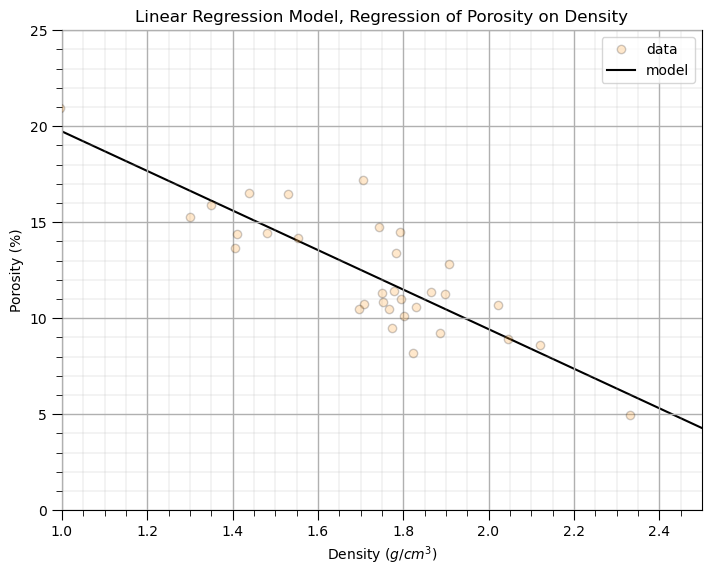

In [7]:
x_values = np.linspace(xmin,xmax,100)                       # return an array of density values 
y_model = slope * x_values + intercept                      # apply our linear regression model to estimate at the training data values

plt.subplot(111)                                            # plot the model
plt.plot(x, y, 'o', label='data', color = 'darkorange', alpha = 0.2, markeredgecolor = 'black',zorder=10)
plt.plot(x_values, y_model, label='model', color = 'black',zorder=1)
plt.title('Linear Regression Model, Regression of ' + yname + ' on ' + xname)
plt.xlabel(xname + ' (' + xunit + ')')
plt.ylabel(yname + ' (' + yunit + ')')
plt.legend(); add_grid(); plt.xlim([xmin,xmax]); plt.ylim([ymin,ymax])
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

#### Calculate the Solution Space

Sample of mesh of possible linear regression model parameters and calculate the MSE over all data.

* Note we are not attemption train and test split for model hyperparameter tuning. While we could add a hyper parameter through regularization with LASSO or ridge regression, we just want to visualize this problem.

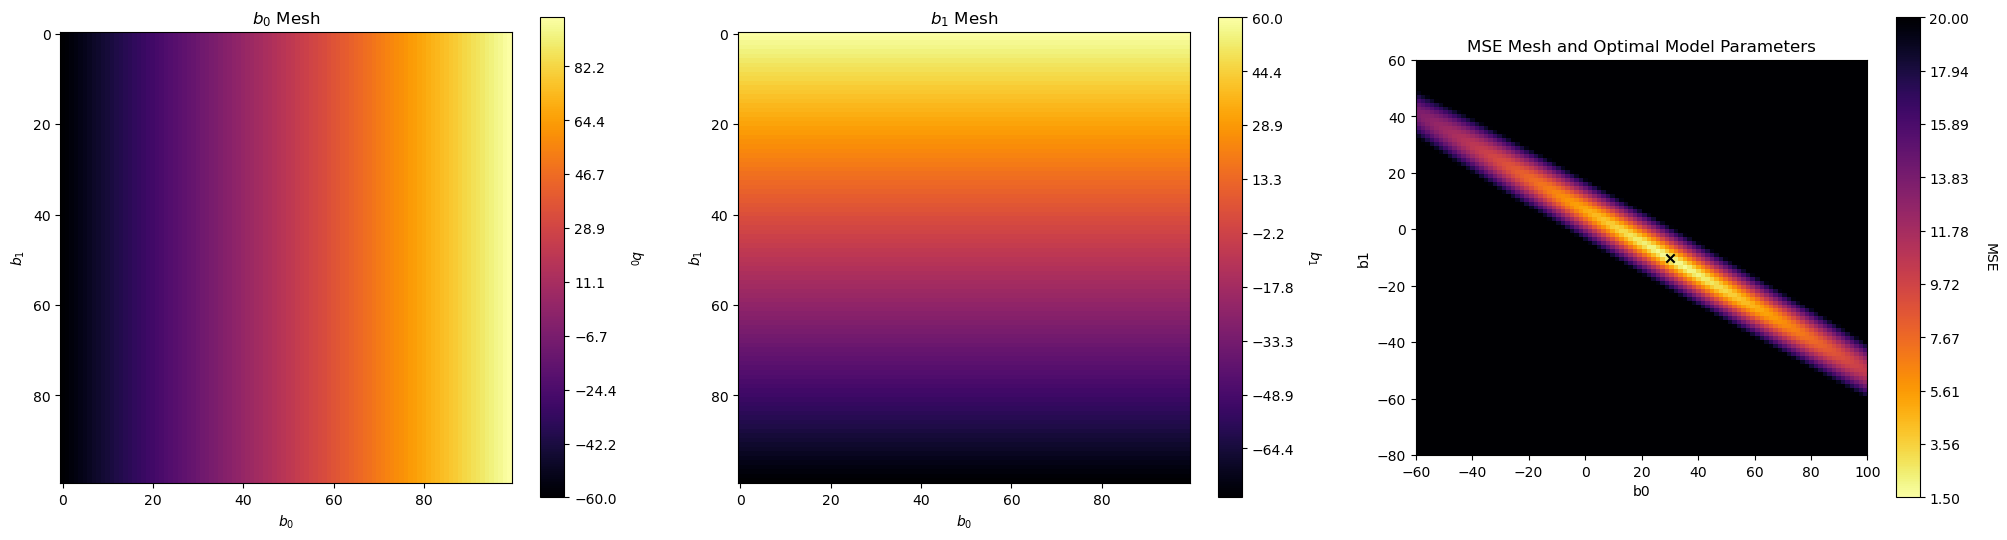

In [8]:
vmin = 1.5; vmax = 20.0; #vmax = np.max(MSE_mat)            # set min and max MSE for visualization
norm = colors.Normalize(vmin=vmin, vmax=vmax)
nstep = 100; MSE_mat = np.zeros([nstep,nstep])              # set up the madel parameter mesh
sb0 = -60.0; eb0 = 100.0; stepb0 = (eb0-sb0)/nstep;         
sb1 = -80.0; eb1 = 60.0; stepb1 = (eb1-sb1)/nstep;
b0_vector = np.arange(sb0, eb0, stepb0); b1_vector = np.arange(eb1, sb1, -1*stepb1)
b0_mat, b1_mat = np.meshgrid(b0_vector, b1_vector)

for ib0, b0 in enumerate(b0_vector):                        # calculate the MSE for all possible model parameters
    for ib1, b1 in enumerate(b1_vector):
        y_hat = b1 * x + b0
        MSE_mat[ib1,ib0] = np.sqrt(((y - y_hat) ** 2).mean())

plt.subplot(131)
im = plt.imshow(b0_mat,cmap=plt.cm.inferno)
plt.title('$b_0$ Mesh')
plt.xlabel('$b_0$'); plt.ylabel('$b_1$')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(sb0, eb0, 10))
cbar.set_label('$b_0$', rotation=270, labelpad=20)

plt.subplot(132)
im = plt.imshow(b1_mat,cmap=plt.cm.inferno)
plt.title('$b_1$ Mesh')
plt.xlabel('$b_0$'); plt.ylabel('$b_1$')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(sb1, eb1, 10))
cbar.set_label('$b_1$', rotation=270, labelpad=20)

plt.subplot(133)
im = plt.imshow(MSE_mat,interpolation = None,extent = [sb0,eb0,sb1,eb1], vmin = vmin, vmax = vmax,alpha=1.0,cmap = plt.cm.inferno_r)
plt.scatter(intercept,slope,marker='x',color='black')
plt.title('MSE Mesh and Optimal Model Parameters')
plt.xlabel('b0'); plt.ylabel('b1')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(vmin, vmax, 10))
cbar.set_label('MSE', rotation=270, labelpad=20)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.0, wspace=0.2, hspace=0.1); plt.show()

#### Visualize the Solution Space and Sample Suboptimal solutions.

We produce the follow 2 plots:
    
1. the MSE mapped and contoured over a wide range of model parameters, $b_1$ slope and $b_0$ intercept. Plot the optimal (+) and suboptimal model parameter combinations (o) (right plot)

2. the data and the optimal and sampled suboptimal models colored by MSE (same as right plot) and sorted with descending MSE so the best models are on top

Suboptimal models are sampled with inverse weighting such that better model parameters (minimize MSE) are more likely sampled.

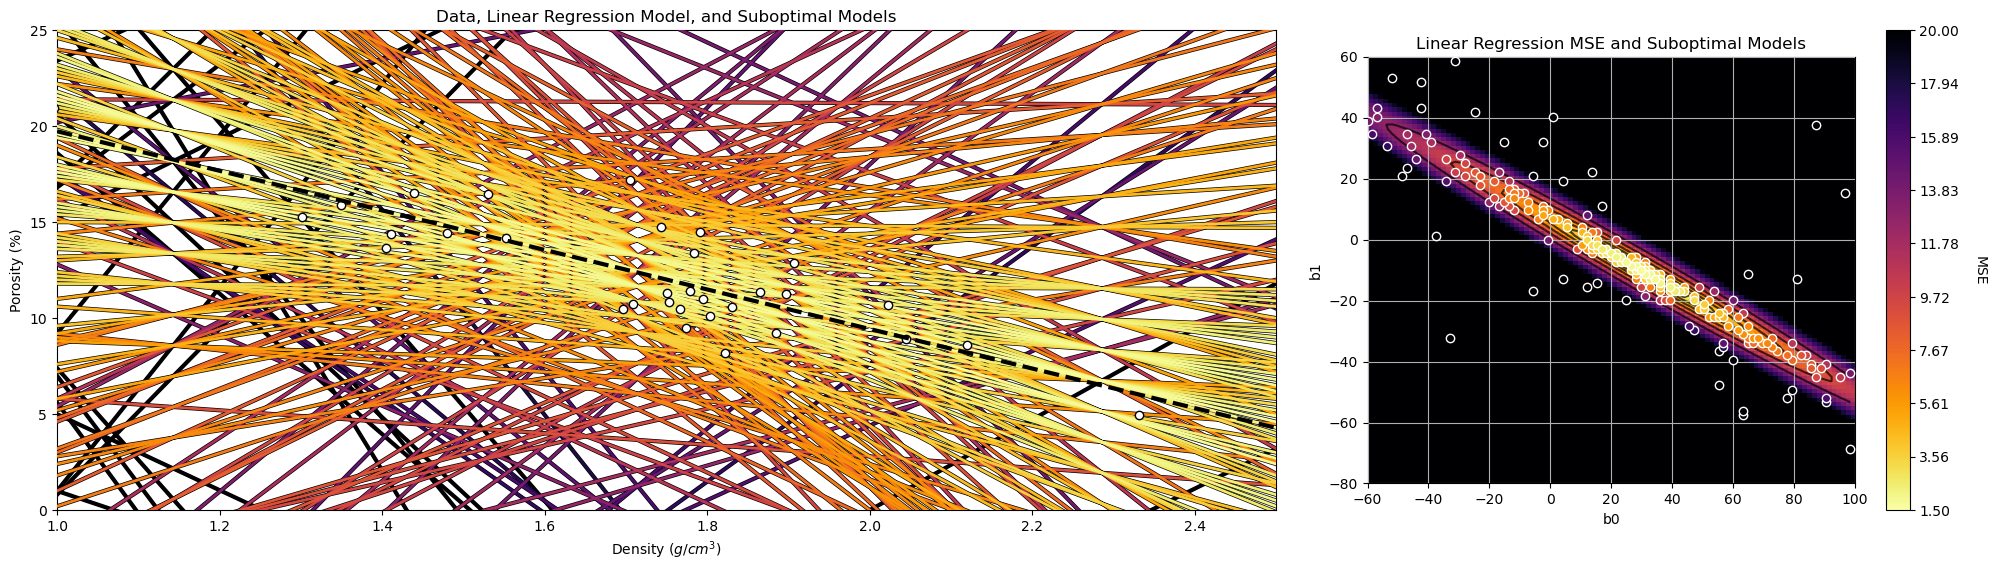

In [9]:
nsamples = 200

np.random.seed(seed=seed)
df_results = pd.DataFrame({'b0':b0_mat.flatten(),'b1':b1_mat.flatten(),'MSE':MSE_mat.flatten()})

samples = df_results.sample(weights=(1.0/df_results['MSE'])**2.0, n=nsamples)
samples = samples.sort_values(by='MSE',ascending=False).reset_index()

fig, ax = plt.subplots(1,2, gridspec_kw={'width_ratios': [2, 1]})

ax[0].plot(x, y, 'o', label='data', color = 'white', alpha = 1.0, markeredgecolor = 'black',zorder=10000)
ax[0].plot(x_values, y_model, label='model', color = 'black',ls='--',lw=3,zorder=10000)

for isample in range(0,len(samples)):
    y_alt = samples.loc[isample,'b1'] * x_values + samples.loc[isample,'b0']
    ax[0].plot(x_values, y_alt, c = 'black',zorder=isample*3+1,lw=3)
    ip = ax[0].plot(x_values, y_alt, c = plt.cm.inferno_r(norm(samples.loc[isample,'MSE'])),zorder=isample*10+2,lw=2)

ax[0].set_title('Data, Linear Regression Model, and Suboptimal Models')
ax[0].set_xlabel(xname + ' (' + xunit + ')')
ax[0].set_ylabel(yname + ' (' + yunit + ')')
ax[0].set_xlim([xmin,xmax]); ax[0].set_ylim([ymin,ymax])

im = ax[1].imshow(MSE_mat,interpolation = None,extent = [sb0,eb0,sb1,eb1], vmin = vmin, vmax = vmax,alpha=1.0,cmap = plt.cm.inferno_r)
ax[1].contour(b0_mat,b1_mat,MSE_mat,levels = np.logspace(0.0,1.1,10),colors='black',alpha=0.7)
ax[1].set_title('Linear Regression MSE and Suboptimal Models')
ax[1].set_xlabel('b0')
ax[1].set_ylabel('b1')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(vmin, vmax, 10))
cbar.set_label('MSE', rotation=270, labelpad=20)
# plt.savefig(fig_name + "." + image_type, dpi=dpi)
plt.scatter(intercept,slope,marker='x',color='black')
for isample in range(0,len(samples)):
    ax[1].scatter(samples.loc[isample,'b0'],samples.loc[isample,'b1'],marker='o',edgecolor='white',color = plt.cm.inferno_r(norm(samples.loc[isample,'MSE'])),zorder=100)
plt.grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.0, wspace=0.1, hspace=0.1); plt.show()

This is a very interesting summary of the optimal and many solutions with variable level of suboptimality.

#### Comments

Linear regression is efficient with the stats module of the SciPy package in Python. With one line of code we can build a model and get the outputs needed to make predictions and check the model. I hope this was helpful,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin
On twitter I'm the @GeostatsGuy.


***

#### More on Michael Pyrcz and the Texas Center for Geostatistics:

### Michael Pyrcz, Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
